## 様々な分類器の比較
* 本実習は[総合実験（１〜４日目）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E7%B7%8F%E5%90%88%E5%AE%9F%E9%A8%93%EF%BC%91%E6%97%A5%E7%9B%AE.ipynb)の内容を全て理解していることを前提としています。

* まずは [Classifier comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) のサンプルプログラムから。

Automatically created module for IPython interactive environment


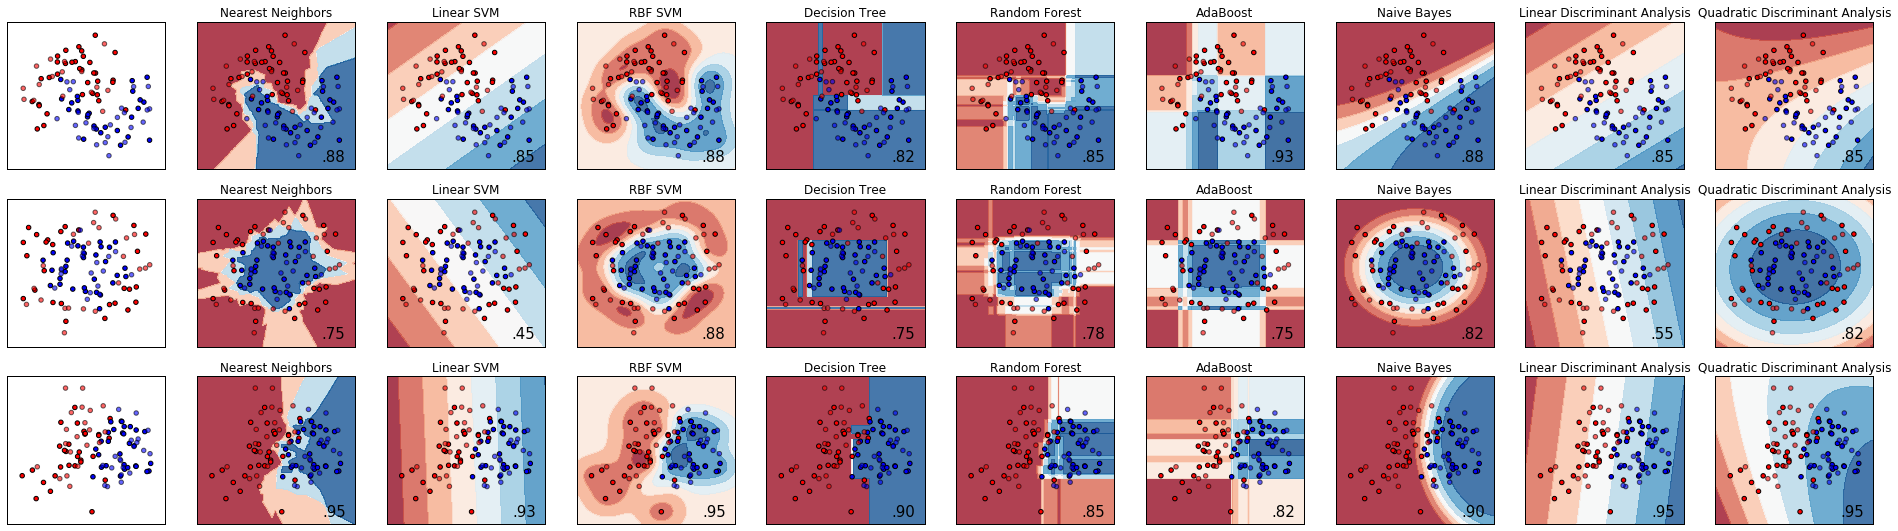

In [1]:
%matplotlib inline
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

### 参考資料
* [Scikit-learnのモデルをまとめてみた](http://nonbiri-tereka.hatenablog.com/entry/2015/02/16/081057)
* [k-近傍法](http://image.slidesharecdn.com/08-09k-lvq-110717231234-phpapp02/95/08-09-k-lvq-6-728.jpg)
・ [決定木](http://image.slidesharecdn.com/introductiontorandomforesttokyor-110129020504-phpapp02/95/r-random-forest-tokyor-11-79-728.jpg)
・[ランダムフォレスト](http://image.slidesharecdn.com/pdf-140718220012-phpapp02/95/-9-638.jpg)
・[AdaBoost](http://blog.livedoor.jp/kmiwa_project/archives/1027623287.html)
・[ガウシアン・ナイーブ・ベイズ](http://qiita.com/ynakayama/items/ca3f5e9d762bbd50ad1f)
・[線形判別分析](http://image.slidesharecdn.com/chap041taos-101105142140-phpapp02/95/prml-41-discriminant-function-21-638.jpg)
・[二次判別分析](http://gc.sfc.keio.ac.jp/class/2002_14490/slides/08/img/10.png)


### より汎用的に使えるように改変してみました。
* タブ区切りのファイルを読み込み、PCAで次元圧縮し、様々な分類器で分類を行う流れを作ってみました。

In [2]:
def conduct_PCA(df):
    #import sklearn #機械学習のライブラリ
    from sklearn.decomposition import PCA #主成分分析器
    #主成分分析の実行
    pca = PCA()
    pca.fit(df.iloc[:, 1:5])
    # データを主成分空間に写像 = 次元圧縮
    feature = pca.transform(df.iloc[:, 1:5])
    # 既知ラベルの名前を、0, 1, 2 などの数字に置き換えます。
    target_names = []
    target = []
    for word in df[df.columns[5]]:
        if word not in target_names:
            target_names.append(word)
        target.append(target_names.index(word))
    return feature, target

In [3]:
def compare_classifiers(X, y):
    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
             "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
             "Quadratic Discriminant Analysis"]
    
    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        AdaBoostClassifier(),
        GaussianNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis()]
    
    figure = plt.figure(figsize=(12, 12))
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    i = 1
    #ax = plt.subplot(3, len(classifiers) / 3, i)

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        ax = plt.subplot(3, len(classifiers) / 3, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #[:, 1]
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [4]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ToyData_linear.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'ToyData_linear.txt')
import pandas as pd # データフレームワーク処理のライブラリをインポート
df = pd.read_csv("ToyData_linear.txt", sep='\t', na_values=".") # データの読み込み

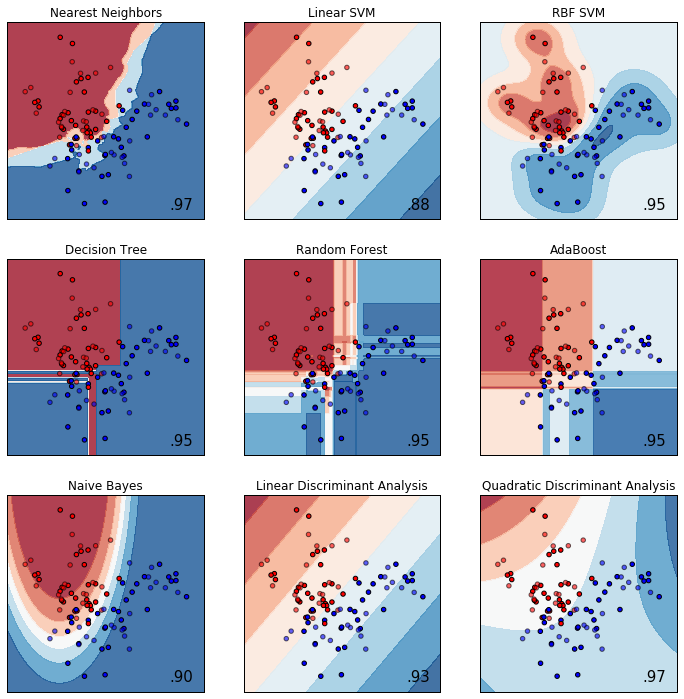

In [5]:
feature, target = conduct_PCA(df)
X, y = feature[:, :2], target
compare_classifiers(X, y)

In [6]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ToyData_moons.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'ToyData_moons.txt')
import pandas as pd # データフレームワーク処理のライブラリをインポート
df = pd.read_csv("ToyData_moons.txt", sep='\t', na_values=".") # データの読み込み

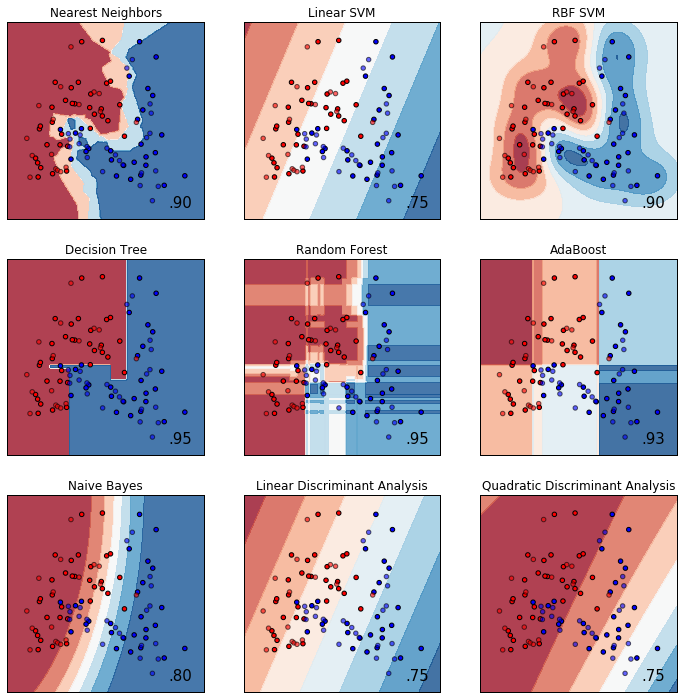

In [7]:
feature, target = conduct_PCA(df)
X, y = feature[:, :2], target
compare_classifiers(X, y)

In [8]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ToyData_circles.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'ToyData_circles.txt')
import pandas as pd # データフレームワーク処理のライブラリをインポート
df = pd.read_csv("ToyData_circles.txt", sep='\t', na_values=".") # データの読み込み

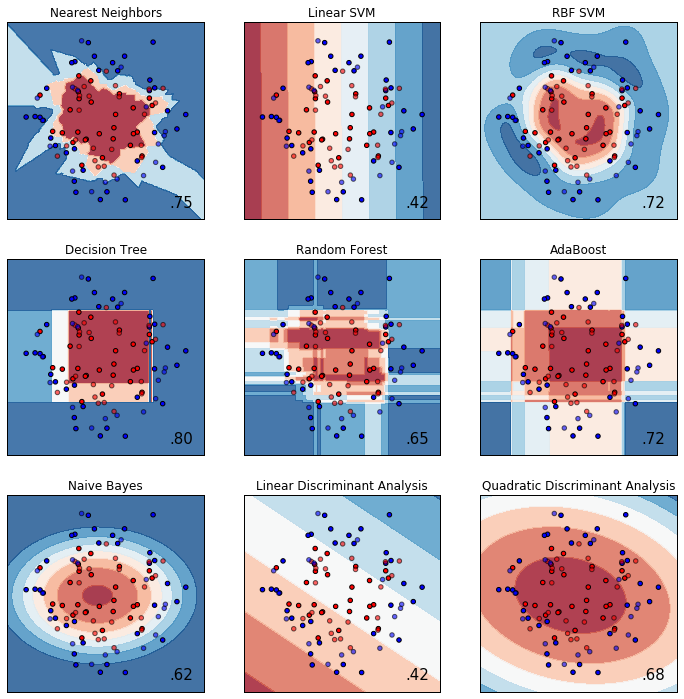

In [9]:
feature, target = conduct_PCA(df)
X, y = feature[:, :2], target
compare_classifiers(X, y)

In [10]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ToyData_gaussian_quantiles.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'ToyData_gaussian_quantiles.txt')
import pandas as pd # データフレームワーク処理のライブラリをインポート
df = pd.read_csv("ToyData_gaussian_quantiles.txt", sep='\t', na_values=".") # データの読み込み

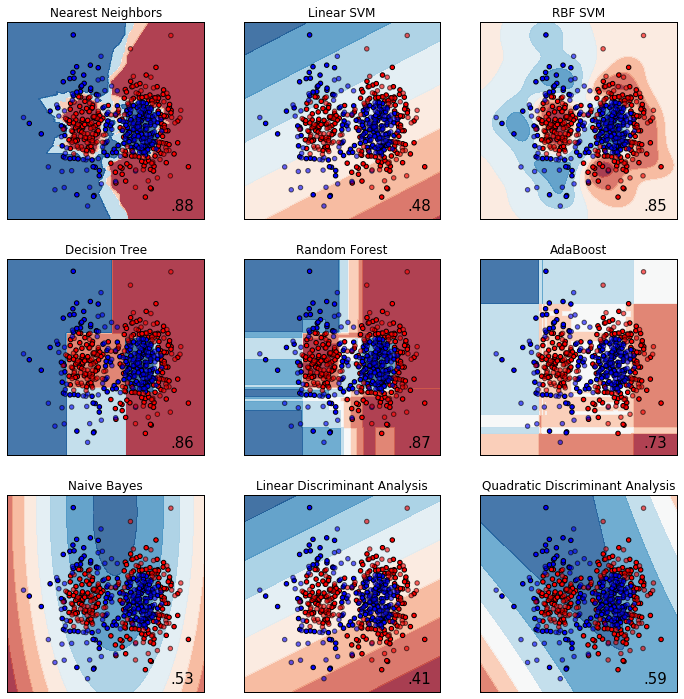

In [11]:
feature, target = conduct_PCA(df)
X, y = feature[:, :2], target
compare_classifiers(X, y)

お疲れ様でした。他の教材は随時下記に追加予定です。→ [IPython Notebook](https://sites.google.com/site/masaakikotera/8-python/8-2-ipython-notebook)